># <font color = blue> <U>Lending Club Case Study - Submission by Mythili and Satya</U> </font>

## Problem Statement 

### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
  
### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
 
The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

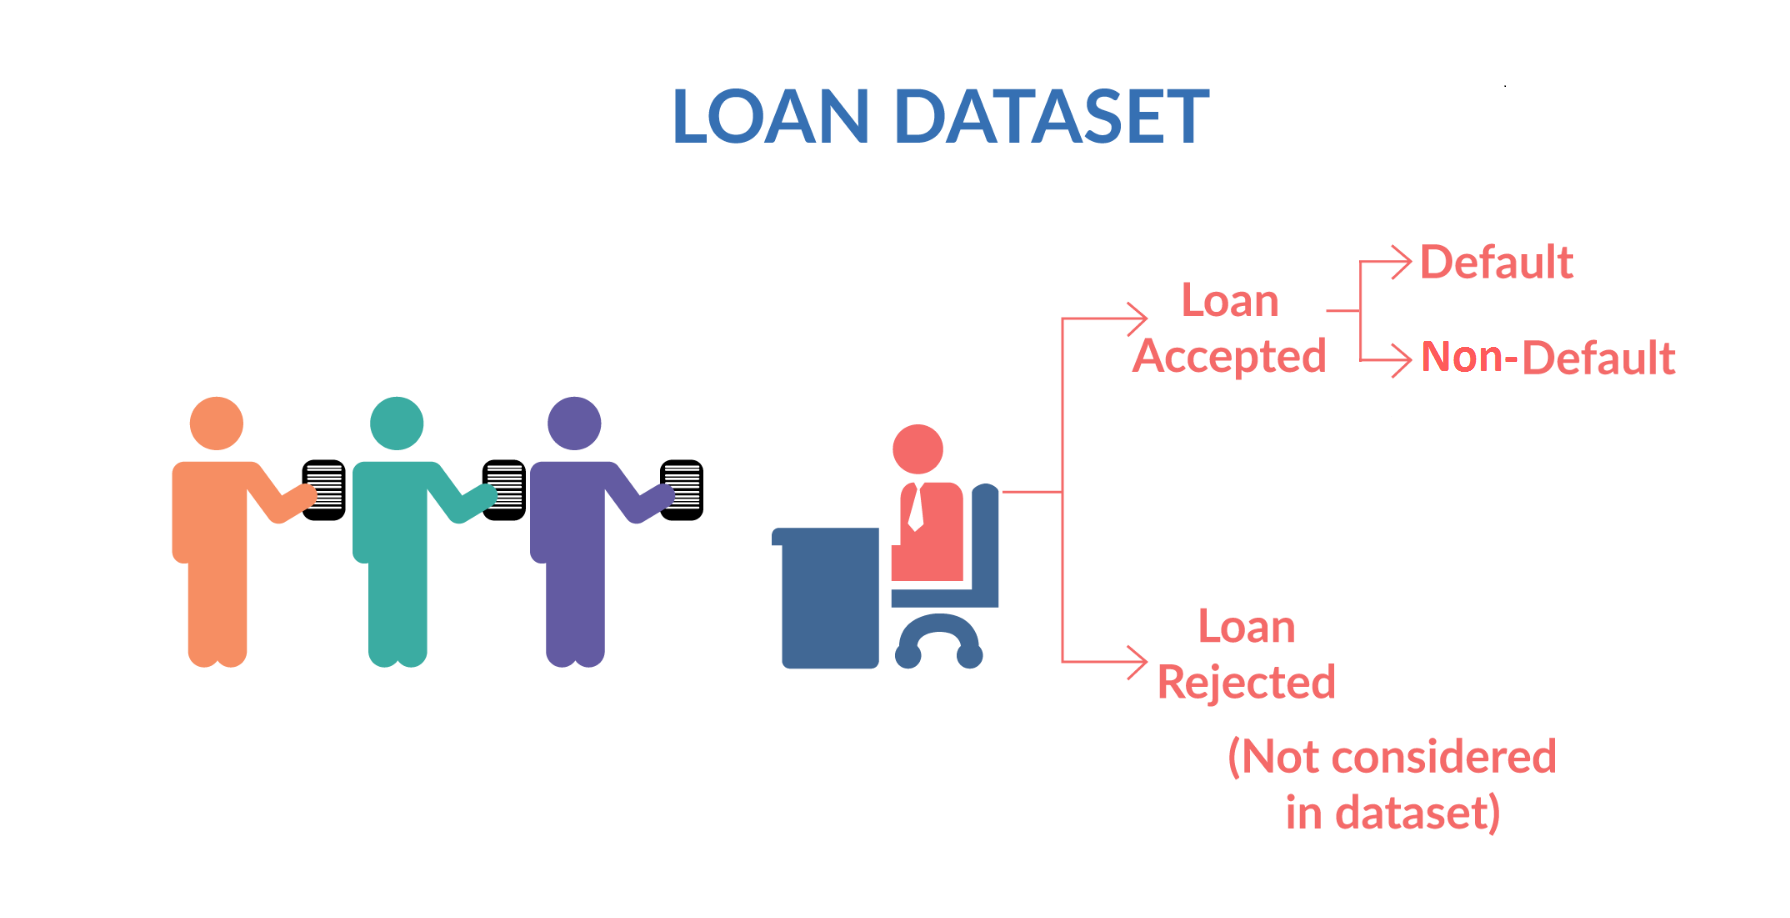
 
When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. <B>Loan accepted:</B> If the company approves the loan, there are 3 possible scenarios described below:
>- <B>Fully paid:</B> Applicant has fully paid the loan (the principal and the interest rate)
>- <B>Current:</B> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
>- <B>Charged-off:</B> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. <B>Loan rejected:</B> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 
### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).
 
### Data Understanding
 
Download the dataset from the upgrad course module. It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

You can access the data dictionary which describes the meaning of these variables from the provided link in upgrad course module.
 
### Results Expected
1. Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
2. Present the overall approach of the analysis in a presentation: 
>- Mention the problem statement and the analysis approach briefly 
>- Explain the results of univariate, bivariate analysis etc. in business terms
>- Include visualisations and summarise the most important results in the presentation
 
You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 
 
<B>Important Note</B>: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". 
 
You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video in the module to understand how to create the GitHub repository. Make sure your GitHub link is public. 



### Import Necessary Libraries

In [222]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore') #Ignore warnings

### Read data from loan file in dataframe

In [223]:
df = pd.read_csv('loan.csv') 

In [224]:
df.shape #Display shape of the data frame

(39717, 111)

In [225]:
pd.set_option('display.max_columns', None) #set dataframe to show all columns
df.head(5) #display top 5 rows from the dataframe

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [226]:
df.info(verbose=True, show_counts=True) #Display dataframe information for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Observations
- Total numbers of rows are 39717.
- Total numbers of columns are 111.
- Data type of some columns i.e. term, int_rate are object. These should be converted to int, float by removing non numeric characters from the value.
- Many columns i.e. emp_length, emp_length, desc etc have missing values. These needs to be imputed or dropped based on case to case basis.
- Many columns i.e. mths_since_last_major_derog, annual_inc_joint, dti_joint etc. have only null values. These columns can be dropped.
- Distribution of columns based on datatypes are: float64(74), int64(13), object(24)

## Data Cleaning

### Check and drop columns having only null values

In [227]:
df.isnull().all().sum() # Count the number of columns having only null values

54

In [228]:
df = df.dropna(axis=1, how='all') # Drop all the columns having only null values

In [229]:
df.shape #Display shape of the dataframe after dropping null columns, it should be 57(111-54)

(39717, 57)

### Check missing values in remaining columns

In [230]:
(df.isnull().mean()*100).round(2)   #Display percentage of missing values for each column unpto two decimal points

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [231]:
null_perc = (df.isnull().mean()*100).round(2) #Store null %age of all columns
null_perc[null_perc >0].sort_values(ascending=False) #Display only the columns with null values in descending order

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

### Drop/Impute columns having too many missing values - more than 40 to 50%
#### As a rule of thumb we should not consider any columns with more than 40 to 50% missing values. But lets look at case to case basis for columns matching this criteria.
1. next_pymnt_d(97% missing values) - Next scheduled payment date:- 
- Since this column as 97% missing records and we does not need it for our analysis, we can drop it
2. mths_since_last_record(93% missing values) - The number of months since the last public record:-
- As per the definition of this field, it is expected that not all rows will have data. This column can be meaningful during out analysis so lets keep it and replace all null values with zero.
3. mths_since_last_delinq(65% missing values) - The number of months since the borrower's last delinquency:-
- As per the definition of this field, it is expected that not all rows will have data. This column can be meaningful during out analysis so lets keep it and replace all null values with zero.

In [232]:
df=df.drop("next_pymnt_d",axis=1)

In [233]:
df["mths_since_last_record"]=df["mths_since_last_record"].fillna(0) #impute mths_since_last_record with zero for missing  values
df["mths_since_last_delinq"]=df["mths_since_last_delinq"].fillna(0) #impute mths_since_last_delinq with zero for missing  values

In [234]:
null_perc = (df.isnull().mean()*100).round(2) #Store null %age of all columns
null_perc[null_perc >0].sort_values(ascending=False) #Display only the columns with null values in descending order

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

### Drop/Impute other columns with missing values

In [235]:
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     0.0   
1           Apr-99               5                     0.0   
2           Nov-01               2                     0.0   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     0.0         3        0      13648     83.70%          9   
1                     0.0         3        0       1687      9.40%          4   
2                     0.0         2        0       2956     98.50%         10   
3                     0.0        10        0       5598        21%         37   
4                     0.0        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

#### desc - Loan description provided by the borrower

In [236]:
#Desc does not seem relevant for our analysis and has 33% missing value. So lets drop it
df=df.drop("desc",axis=1)

#### emp_title - The job title supplied by the Borrower when applying for the loan.(Employer Title replaces Employer Name for all loans listed after 9/23/2013)

In [237]:
#emp_title does not seem relevant for our analysis and has 6% missing value. So lets drop it
df=df.drop("emp_title",axis=1)

#### emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [238]:
#emp_length seems relevant for our analysis. So, lets look at the rows with missing values
df[df["emp_length"].isnull()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
168    1067644    1302032       2500         2500       2500.00000   
323    1058717    1290516      18000        18000      18000.00000   
394    1064582    1298394       4000         4000       4000.00000   
422    1064366    1298164       1000         1000       1000.00000   
439    1063912    1296491       8250         8250       8250.00000   
...        ...        ...        ...          ...              ...   
32591   480410     610728      10000        10000       9975.00000   
32608   480216     610335       3700         3700       3700.00000   
32621   479954     609955      10000        10000       9731.17513   
32631   479836     609803       6000         6000       6000.00000   
32665   479468     609246      25000        25000      23912.90328   

             term int_rate  installment grade sub_grade emp_length  \
168     36 months    7.51%        77.78     A        A3        NaN   
323     60 months   17.58%       452.98     D        D4        NaN   
394     36 months   11.71%       132.31     B        B3        NaN   
422     36 months   14.65%        34.50     C        C3        NaN   
439     36 months    7.51%       256.67     A        A3        NaN   
...           ...      ...          ...   ...       ...        ...   
32591   36 months   14.22%       342.85     C        C5        NaN   
32608   36 months   14.22%       126.86     C        C5        NaN   
32621   36 months   14.22%       342.85     C        C5        NaN   
32631   36 months   12.73%       201.40     C        C1        NaN   
32665   36 months   10.25%       809.62     B        B2        NaN   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
168              OWN     12000.0     Source Verified  Dec-11  Charged Off   
323         MORTGAGE     60000.0            Verified  Dec-11   Fully Paid   
394             RENT     24000.0     Source Verified  Dec-11   Fully Paid   
422             RENT     18408.0        Not Verified  Dec-11  Charged Off   
439         MORTGAGE     31500.0            Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
32591           RENT     45000.0        Not Verified  Jan-10   Fully Paid   
32608           RENT     17496.8        Not Verified  Jan-10   Fully Paid   
32621       MORTGAGE     36000.0        Not Verified  Jan-10  Charged Off   
32631       MORTGAGE     60000.0        Not Verified  Jan-10   Fully Paid   
32665       MORTGAGE    134000.0        Not Verified  Feb-10   Fully Paid   

      pymnt_plan                                                url  \
168            n  https://lendingclub.com/browse/loanDetail.acti...   
323            n  https://lendingclub.com/browse/loanDetail.acti...   
394            n  https://lendingclub.com/browse/loanDetail.acti...   
422            n  https://lendingclub.com/browse/loanDetail.acti...   
439            n  https://lendingclub.com/browse/loanDetail.acti...   
...          ...                                                ...   
32591          n  https://lendingclub.com/browse/loanDetail.acti...   
32608          n  https://lendingclub.com/browse/loanDetail.acti...   
32621          n  https://lendingclub.com/browse/loanDetail.acti...   
32631          n  https://lendingclub.com/browse/loanDetail.acti...   
32665          n  https://lendingclub.com/browse/loanDetail.acti...   

                  purpose                       title zip_code addr_state  \
168    debt_consolidation            GET FREE OF DEBT    961xx         CA   
323    debt_consolidation               consolidation    363xx         AL   
394      home_improvement  Reline pool and fix steeps    328xx         FL   
422        major_purchase                      Myloan    080xx         NJ   
439    debt_consolidation                     do over    218xx         MD   
...                   ...                         ...      ...        ...   
32591      sm

Number of rows with missing values is 1075 out of 39717, which is 2.7%. Looking the data it does not appear that we can somehow derive this data from other columns so lets drop the rows with missing values

In [239]:
df = df[df["emp_length"].notna()] #overwrite dataframe with valid rows 

In [240]:
df.shape #number of remaing rows should be 38642(39717-1075)

(38642, 54)

#### pub_rec_bankruptcies - Number of public record bankruptcies

In [241]:
#pub_rec_bankruptcies seems relevant for our analysis. So, lets look at the rows with missing values
df[df["pub_rec_bankruptcies"].isnull()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
35006  69001     265533      15000        15000     14875.000000   36 months   
35058  59006     154254       3000         3000      2988.236621   36 months   
35362  65426     232106       4000         4000      3892.258856   36 months   
38443  68926     264924       2300         2300       589.605658   36 months   
38717  69251     267771       6000         6000       500.000000   36 months   
...      ...        ...        ...          ...              ...         ...   
39712  92187      92174       2500         2500      1075.000000   36 months   
39713  90665      90607       8500         8500       875.000000   36 months   
39714  90395      90390       5000         5000      1325.000000   36 months   
39715  90376      89243       5000         5000       650.000000   36 months   
39716  87023      86999       7500         7500       800.000000   36 months   

      int_rate  installment grade sub_grade emp_length home_ownership  \
35006    8.94%       476.58     A        A5   < 1 year       MORTGAGE   
35058   14.26%       102.92     C        C5    3 years       MORTGAGE   
35362   11.14%       131.22     B        B1   < 1 year       MORTGAGE   
38443   13.17%        77.69     D        D2  10+ years           RENT   
38717    8.00%       188.02     A        A3   < 1 year       MORTGAGE   
...        ...          ...   ...       ...        ...            ...   
39712    8.07%        78.42     A        A4    4 years       MORTGAGE   
39713   10.28%       275.38     C        C1    3 years           RENT   
39714    8.07%       156.84     A        A4   < 1 year       MORTGAGE   
39715    7.43%       155.38     A        A2   < 1 year       MORTGAGE   
39716   13.75%       255.43     E        E2   < 1 year            OWN   

       annual_inc verification_status issue_d  loan_status pymnt_plan  \
35006    110000.0        Not Verified  Sep-09   Fully Paid          n   
35058     80800.0        Not Verified  Sep-09   Fully Paid          n   
35362     60000.0        Not Verified  Aug-09  Charged Off          n   
38443     37152.0            Verified  Aug-08   Fully Paid          n   
38717     75000.0        Not Verified  May-08   Fully Paid          n   
...           ...                 ...     ...          ...        ...   
39712    110000.0        Not Verified  Jul-07   Fully Paid          n   
39713     18000.0        Not Verified  Jul-07   Fully Paid          n   
39714    100000.0        Not Verified  Jul-07   Fully Paid          n   
39715    200000.0        Not Verified  Jul-07   Fully Paid          n   
39716     22000.0        Not Verified  Jun-07   Fully Paid          n   

                                                     url             purpose  \
35006  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
35058  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
35362  https://lendingclub.com/browse/loanDetail.acti...                 car   
38443  https://lendingclub.com/browse/loanDetail.acti...              moving   
38717  https://lendingclub.com/browse/loanDetail.acti...               other   
...                                                  ...                 ...   
39712  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
39713  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
39714  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
39715  https://lendingclub.com/browse/loanDetail.acti...               other   
39716  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                                    title zip_code addr_state    dti  \
35006                      Revolving Debt    146xx         NY   7.07   
35058  Rejecting new cardmember agreement    775xx         TX  14.97   
35362                                 djp    481xx         MI  11.08   
38443                             tee_cee    0

In [242]:
null_perc = (df.isnull().mean()*100).round(2) #Store null %age of all columns
null_perc[null_perc >0].sort_values(ascending=False) #Display only the columns with null values in descending order

pub_rec_bankruptcies          1.80
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.12
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

In [243]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

We can see that almost 95% of the rows have value as zero, so we can safely fill the null values with zero

In [244]:
df['pub_rec_bankruptcies'].mode()[0]

0.0

In [245]:
df["pub_rec_bankruptcies"]=df["pub_rec_bankruptcies"].fillna(df['pub_rec_bankruptcies'].mode()[0]) #impute pub_rec_bankruptcies with mode value

In [246]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    37072
1.0     1563
2.0        7
Name: count, dtype: int64

#### Remaining columns with missing values are very less. We can safely drop the rows with null values
- <B>Column name -                   Percentage of null values</B>
- last_pymnt_d                  0.17
- collections_12_mths_ex_med    0.14
- chargeoff_within_12_mths      0.14
- revol_util                    0.12
- tax_liens                     0.10
- title                         0.03
- last_credit_pull_d            0.01

In [247]:
df.shape

(38642, 54)

In [248]:
df1 = df #backup data frame

In [249]:
df.isnull().any(axis=1).sum() #number of rows having any null values

177

In [250]:
df.dropna(inplace=True) #drop all the rows having null values

In [251]:
df.shape

(38465, 54)

<B>We can see that 38642-38465=177 rows got dropped. Number of columns remains same as 54, before and after</B>

In [252]:
df.isnull().sum()   #Display count of missing values for each column, all should be zeroes

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

### Check for columns having only one unique value and drop them 

In [253]:
df.nunique() #unique values in dataframe

id                            38465
member_id                     38465
loan_amnt                       879
funded_amnt                    1037
funded_amnt_inv                8084
term                              2
int_rate                        371
installment                   15082
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5086
verification_status               3
issue_d                          53
loan_status                       3
pymnt_plan                        1
url                           38465
purpose                          14
title                         19047
zip_code                        820
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
mths_since_last_delinq           95
mths_since_last_record      

In [254]:
columns_to_drop = df.columns[df.nunique() == 1] #column names with only 1 unique value in dataframe - 9 columns

In [255]:
df.shape

(38465, 54)

In [256]:
df = df.drop(columns=columns_to_drop,axis=1)

In [257]:
df.shape

(38465, 45)

In [258]:
#Reset the index
df.reset_index(inplace=True, drop=True)

## Fix data types of object type columns

In [259]:
df.select_dtypes(include=object).info() #display information of only the columns having datatype as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38465 entries, 0 to 38464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 38465 non-null  object
 1   int_rate             38465 non-null  object
 2   grade                38465 non-null  object
 3   sub_grade            38465 non-null  object
 4   emp_length           38465 non-null  object
 5   home_ownership       38465 non-null  object
 6   verification_status  38465 non-null  object
 7   issue_d              38465 non-null  object
 8   loan_status          38465 non-null  object
 9   url                  38465 non-null  object
 10  purpose              38465 non-null  object
 11  title                38465 non-null  object
 12  zip_code             38465 non-null  object
 13  addr_state           38465 non-null  object
 14  earliest_cr_line     38465 non-null  object
 15  revol_util           38465 non-null  object
 16  last

In [260]:
df.select_dtypes(include=object).head(5) #Display values of only the object data type columns

term int_rate grade sub_grade emp_length home_ownership  \
0   36 months   10.65%     B        B2  10+ years           RENT   
1   60 months   15.27%     C        C4   < 1 year           RENT   
2   36 months   15.96%     C        C5  10+ years           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
4   60 months   12.69%     B        B5     1 year           RENT   

  verification_status issue_d  loan_status  \
0            Verified  Dec-11   Fully Paid   
1     Source Verified  Dec-11  Charged Off   
2        Not Verified  Dec-11   Fully Paid   
3     Source Verified  Dec-11   Fully Paid   
4     Source Verified  Dec-11      Current   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
4  https://lendingclub.com/browse/loanDetail.acti...           other   

                  title zip_code addr_state earliest_cr_line revol_util  \
0              Computer    860xx         AZ           Jan-85     83.70%   
1                  bike    309xx         GA           Apr-99      9.40%   
2  real estate business    606xx         IL           Nov-01     98.50%   
3              personel    917xx         CA           Feb-96        21%   
4              Personal    972xx         OR           Jan-96     53.90%   

  last_pymnt_d last_credit_pull_d  
0       Jan-15             May-16  
1       Apr-13             Sep-13  
2       Jun-14             May-16  
3       Jan-15             Apr-16  
4       May-16             May-16

#### Observations
- Some columns i.e. url, zip_code are not relevant for this analsys and can be dropped.
- Some columns i.e. term, int_rate, revol_util can be changed to numeric data types.
- Some columns i.e. issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d contains date value which can be changed to date datatype.

In [261]:
df1 = df #backup dataframe as a point of restore

In [262]:
df = df.drop(columns=["url","zip_code"]) #drop columns that are not needed

In [263]:
df.term.value_counts() 

term
 36 months    28131
 60 months    10334
Name: count, dtype: int64

In [264]:
df.term = df.term.apply(lambda x: int(x[:3])) #extract numbers from term column and change to int data type

In [265]:
df.term.dtype

dtype('int64')

In [266]:
df.int_rate = df.int_rate.str.replace('%', '').astype(float) #remove % symbol from int_rate column and change data type to float

In [267]:
df.int_rate.dtype

dtype('float64')

In [268]:
df.revol_util = df.revol_util.str.replace('%', '').astype(float) #remove % symbol from revol_util column and change data type to float

In [269]:
df.revol_util.dtype

dtype('float64')

In [270]:
# Convert the Date columns:issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [271]:
df.issue_d.dtype

dtype('<M8[ns]')

In [272]:
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
4     12.69        67.79     B        B5     1 year           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1     30000.0     Source Verified 2011-12-01  Charged Off             car   
2     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3     49200.0     Source Verified 2011-12-01   Fully Paid           other   
4     80000.0     Source Verified 2011-12-01      Current           other   

                  title addr_state    dti  delinq_2yrs earliest_cr_line  \
0              Computer         AZ  27.65            0       1985-01-01   
1                  bike         GA   1.00            0       1999-04-01   
2  real estate business         IL   8.72            0       2001-11-01   
3              personel         CA  20.00            0       1996-02-01   
4              Personal         OR  17.94            0       1996-01-01   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0               1                     0.0                     0.0         3   
1               5                     0.0                     0.0         3   
2               2                     0.0                     0.0         2   
3               1                    35.0                     0.0        10   
4               0                    38.0                     0.0        15   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648        83.7          9       0.00           0.00   
1        0       1687         9.4          4       0.00           0.00   
2        0       2956        98.5         10       0.00           0.00   
3        0       5598        21.0         37       0.00           0.00   
4        0      27783        53.9         38     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00   2015-01-01   
1                0.00      117.08                     1.11   2013-04-01   
2                0.00        0.00                     0.00   2014-06-01   
3               16.97        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62         2016-05-01                   0.0  
1           119.66         2013-09-01                   0.0  
2           649.91         2016-05-01                   0.0  
3           357.48         2016-04-01                   0.0  
4            67.79         2016-05-01                   0.0

In [273]:
df.select_dtypes(include=object).info() #display information of only the columns having datatype as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38465 entries, 0 to 38464
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grade                38465 non-null  object
 1   sub_grade            38465 non-null  object
 2   emp_length           38465 non-null  object
 3   home_ownership       38465 non-null  object
 4   verification_status  38465 non-null  object
 5   loan_status          38465 non-null  object
 6   purpose              38465 non-null  object
 7   title                38465 non-null  object
 8   addr_state           38465 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [274]:
df.select_dtypes(include=object).head(5) #Display values of only the object data type columns

grade sub_grade emp_length home_ownership verification_status  loan_status  \
0     B        B2  10+ years           RENT            Verified   Fully Paid   
1     C        C4   < 1 year           RENT     Source Verified  Charged Off   
2     C        C5  10+ years           RENT        Not Verified   Fully Paid   
3     C        C1  10+ years           RENT     Source Verified   Fully Paid   
4     B        B5     1 year           RENT     Source Verified      Current   

          purpose                 title addr_state  
0     credit_card              Computer         AZ  
1             car                  bike         GA  
2  small_business  real estate business         IL  
3           other              personel         CA  
4           other              Personal         OR

In [275]:
df.select_dtypes(include=object).nunique() #check count of unique values of object datatypes

grade                      7
sub_grade                 35
emp_length                11
home_ownership             5
verification_status        3
loan_status                3
purpose                   14
title                  19047
addr_state                50
dtype: int64

<B> Title is having too many unique values to make any sense out of it, so it can be dropped </B>

In [276]:
df.drop('title',axis=1,inplace=True)

## Categorize the variables before analysis

In [277]:
df.nunique()

id                         38465
member_id                  38465
loan_amnt                    879
funded_amnt                 1037
funded_amnt_inv             8084
term                           2
int_rate                     371
installment                15082
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5086
verification_status            3
issue_d                       53
loan_status                    3
purpose                       14
addr_state                    50
dti                         2863
delinq_2yrs                   11
earliest_cr_line             515
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21404
revol_util                  1087
total_acc                     82
out_prncp                   1096
out_prncp_

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38465 entries, 0 to 38464
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38465 non-null  int64         
 1   member_id                38465 non-null  int64         
 2   loan_amnt                38465 non-null  int64         
 3   funded_amnt              38465 non-null  int64         
 4   funded_amnt_inv          38465 non-null  float64       
 5   term                     38465 non-null  int64         
 6   int_rate                 38465 non-null  float64       
 7   installment              38465 non-null  float64       
 8   grade                    38465 non-null  object        
 9   sub_grade                38465 non-null  object        
 10  emp_length               38465 non-null  object        
 11  home_ownership           38465 non-null  object        
 12  annual_inc               38465 n

In [279]:
cat_cols=["term","grade","sub_grade","emp_length","home_ownership","verification_status","loan_status","purpose","addr_state","inq_last_6mths","pub_rec","pub_rec_bankruptcies"]
num_cols=["loan_amnt","funded_amnt","int_rate","installment","annual_inc","issue_d","dti","delinq_2yrs","earliest_cr_line","mths_since_last_delinq","mths_since_last_record","open_acc","revol_util","total_acc","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
extra_cols=["id","member_id","funded_amnt_inv","revol_bal","out_prncp_inv","total_pymnt_inv"]

In [280]:
df[num_cols].info() #validate that all the numeric columns have the right data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38465 entries, 0 to 38464
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38465 non-null  int64         
 1   funded_amnt              38465 non-null  int64         
 2   int_rate                 38465 non-null  float64       
 3   installment              38465 non-null  float64       
 4   annual_inc               38465 non-null  float64       
 5   issue_d                  38465 non-null  datetime64[ns]
 6   dti                      38465 non-null  float64       
 7   delinq_2yrs              38465 non-null  int64         
 8   earliest_cr_line         38465 non-null  datetime64[ns]
 9   mths_since_last_delinq   38465 non-null  float64       
 10  mths_since_last_record   38465 non-null  float64       
 11  open_acc                 38465 non-null  int64         
 12  revol_util               38465 n

In [281]:
df1=df #backup data frame as a point of restore

In [282]:
df=df.drop(extra_cols,axis=1) #drop extra columns

In [283]:
df.shape

(38465, 36)

In [284]:
#Reset the index
df.reset_index(inplace=True, drop=True)

## Univariate Analysis

### Numerical

In [285]:
df.loan_status.value_counts()

loan_status
Fully Paid     32053
Charged Off     5314
Current         1098
Name: count, dtype: int64

In [286]:
df_defaulted = df[df.loan_status == 'Charged Off'] #filter loan records for defualted loans
df_defaulted.shape

(5314, 36)

In [287]:
df_fullypaid = df[df.loan_status == 'Fully Paid'] #filter loan records for fully paid loans
df_fullypaid.shape

(32053, 36)

In [288]:
#plot histogram for all numerical columns for the loans which has defualted and fully paid for a pattern comparision
'''
for col in num_cols: 
    plt.title("Histrogram for "+col+" of defaulted loans", fontsize=12)
    sns.histplot(x=df_defaulted[col])
    plt.show()
    
    plt.title("Histrogram for "+col+" of fully paid loans", fontsize=12)
    sns.histplot(x=df_fullypaid[col])
    plt.show()
    print("===============================================================================================================")
'''

with PdfPages('Univaraite Numerical Histrogram.pdf') as pdf:
    for col in num_cols:
        # Plot for defaulted loan
        #plt.figure(figsize=(8, 6))
        plt.title("Histrogram plot for "+col+" of defaulted loans", fontsize=12)
        sns.histplot(x=df_defaulted[col])
        plt.xticks(rotation=90)
        pdf.savefig() # Save plots to a PDF file
        plt.close()

        # Plot for fully paid loan
        #plt.figure(figsize=(8, 6))
        plt.title("Histrogram plot for "+col+" of fully paid loans", fontsize=12)
        sns.histplot(x=df_fullypaid[col])
        plt.xticks(rotation=90)
        pdf.savefig() # Save plots to a PDF file
        plt.close()

    print("Boxplots saved to 'Univaraite Numerical Histrogram.pdf'")


Boxplots saved to 'Univaraite Numerical Histrogram.pdf'


### Categorical

In [289]:
#plot countplot for all categorical columns for the loans which has defualted and fully paid for a pattern comparision
'''
for col in cat_cols:
    plt.title("Count plot for "+col+" of defaulted loans", fontsize=12)
    sns.countplot(x=df_defaulted[col])
    plt.xticks(rotation=90)
    plt.show()

    plt.title("Count plot for "+col+" of fully paid loans", fontsize=12)
    sns.histplot(x=df_fullypaid[col])
    plt.xticks(rotation=90)
    plt.show()
    print("===============================================================================================================")
'''

with PdfPages('Univaraite Categorical countplot.pdf') as pdf:
    for col in cat_cols:
        # Plot for defaulted loan
        plt.figure(figsize=(8, 6))
        plt.title("Count plot for "+col+" of defaulted loans", fontsize=12)
        sns.countplot(x=df_defaulted[col])
        plt.xticks(rotation=90)
        pdf.savefig() # Save plots to a PDF file
        plt.close()

        # Plot for fully paid loan
        plt.figure(figsize=(8, 6))
        plt.title("Count plot for "+col+" of fully paid loans", fontsize=12)
        sns.countplot(x=df_fullypaid[col])
        plt.xticks(rotation=90)
        pdf.savefig() # Save plots to a PDF file
        plt.close()

    print("Boxplots saved to 'Univaraite Categorical countplot.pdf'")

Boxplots saved to 'Univaraite Categorical countplot.pdf'


## Bivariate Analysis

### Numerical vs Numerical

In [290]:
'''
for col1 in num_cols:
    for col2 in num_cols:
        if(col1 != col2):
            plt.title("Scatter plot for "+col+" and "+col2+" of defaulted loans", fontsize=12)
            sns.scatterplot(x=df_defaulted[col1],y=df_defaulted[col2])
            plt.show()
    print("==================================================================================================================")
'''

# Write to PDF instead of outputing here
with PdfPages('Bivariate Num vs Num Scatterplots.pdf') as pdf:
    for col1 in num_cols:
        for col2 in num_cols:
            if (col1 != col2):
                plt.figure(figsize=(8, 6))
                plt.title("Scatter plot for "+col+" and "+col2+" of defaulted loans", fontsize=12)
                sns.scatterplot(x=df_defaulted[col1], y=df_defaulted[col2])
                plt.xticks(rotation=90)
                pdf.savefig() # Save plots to a PDF file
                plt.close()
    print("Boxplots saved to 'Bivariate Num vs Num Scatterlots.pdf'")

Boxplots saved to 'Bivariate Num vs Num Scatterlots.pdf'


### Numerical Vs Categorical

In [291]:
'''
for col1 in cat_cols:
    for col2 in num_cols:
                
        if(col1 != col2) & (not pd.api.types.is_datetime64_any_dtype(df[col2])):                 #exclude date fields
            plt.title("Box plot for "+col1+" and "+col2+" of defaulted loans", fontsize=12)
            sns.boxplot(x=df_defaulted[col1],y=df_defaulted[col2])
            plt.xticks(rotation=90)
            plt.show()
    print("==================================================================================================================")
'''

# Write to PDF instead of outputing here
with PdfPages('Bivariate Num vs Cat boxplots.pdf') as pdf:
    for col1 in cat_cols:
        for col2 in num_cols:
            if (col1 != col2) and (not pd.api.types.is_datetime64_any_dtype(df_defaulted[col2])): #Do not include datetime columns
                plt.figure(figsize=(8, 6))
                plt.title("Box plot for "+col1+" and "+col2+" of defaulted loans", fontsize=12)
                sns.boxplot(x=df_defaulted[col1], y=df_defaulted[col2])
                plt.xticks(rotation=90)
                pdf.savefig() # Save plots to a PDF file
                plt.close()
    print("Boxplots saved to 'Bivariate Num vs Cat boxplots.pdf'")

Boxplots saved to 'Bivariate Num vs Cat boxplots.pdf'


### Categorical Vs Categorical

In [292]:
# Write to PDF instead of outputing here
with PdfPages('Bivariate Cat vs Cat barplots.pdf') as pdf:
    for col1 in cat_cols:
        for col2 in cat_cols:
            if (col1 != col2) and (pd.api.types.is_any_real_numeric_dtype(df_defaulted[col2])): #On the Y axis include only the columns hvaing numeric values
                plt.title("Bar plot for "+col1+" and "+col2+" of defaulted loans", fontsize=12)
                sns.barplot(x=df_defaulted[col1], y=df_defaulted[col2])
                plt.xticks(rotation=90)
                pdf.savefig() # Save plots to a PDF file
                plt.close()
    print("Boxplots saved to 'Bivariate Cat vs Cat barplots.pdf'")

Boxplots saved to 'Bivariate Cat vs Cat barplots.pdf'


## Multivariate Analysis

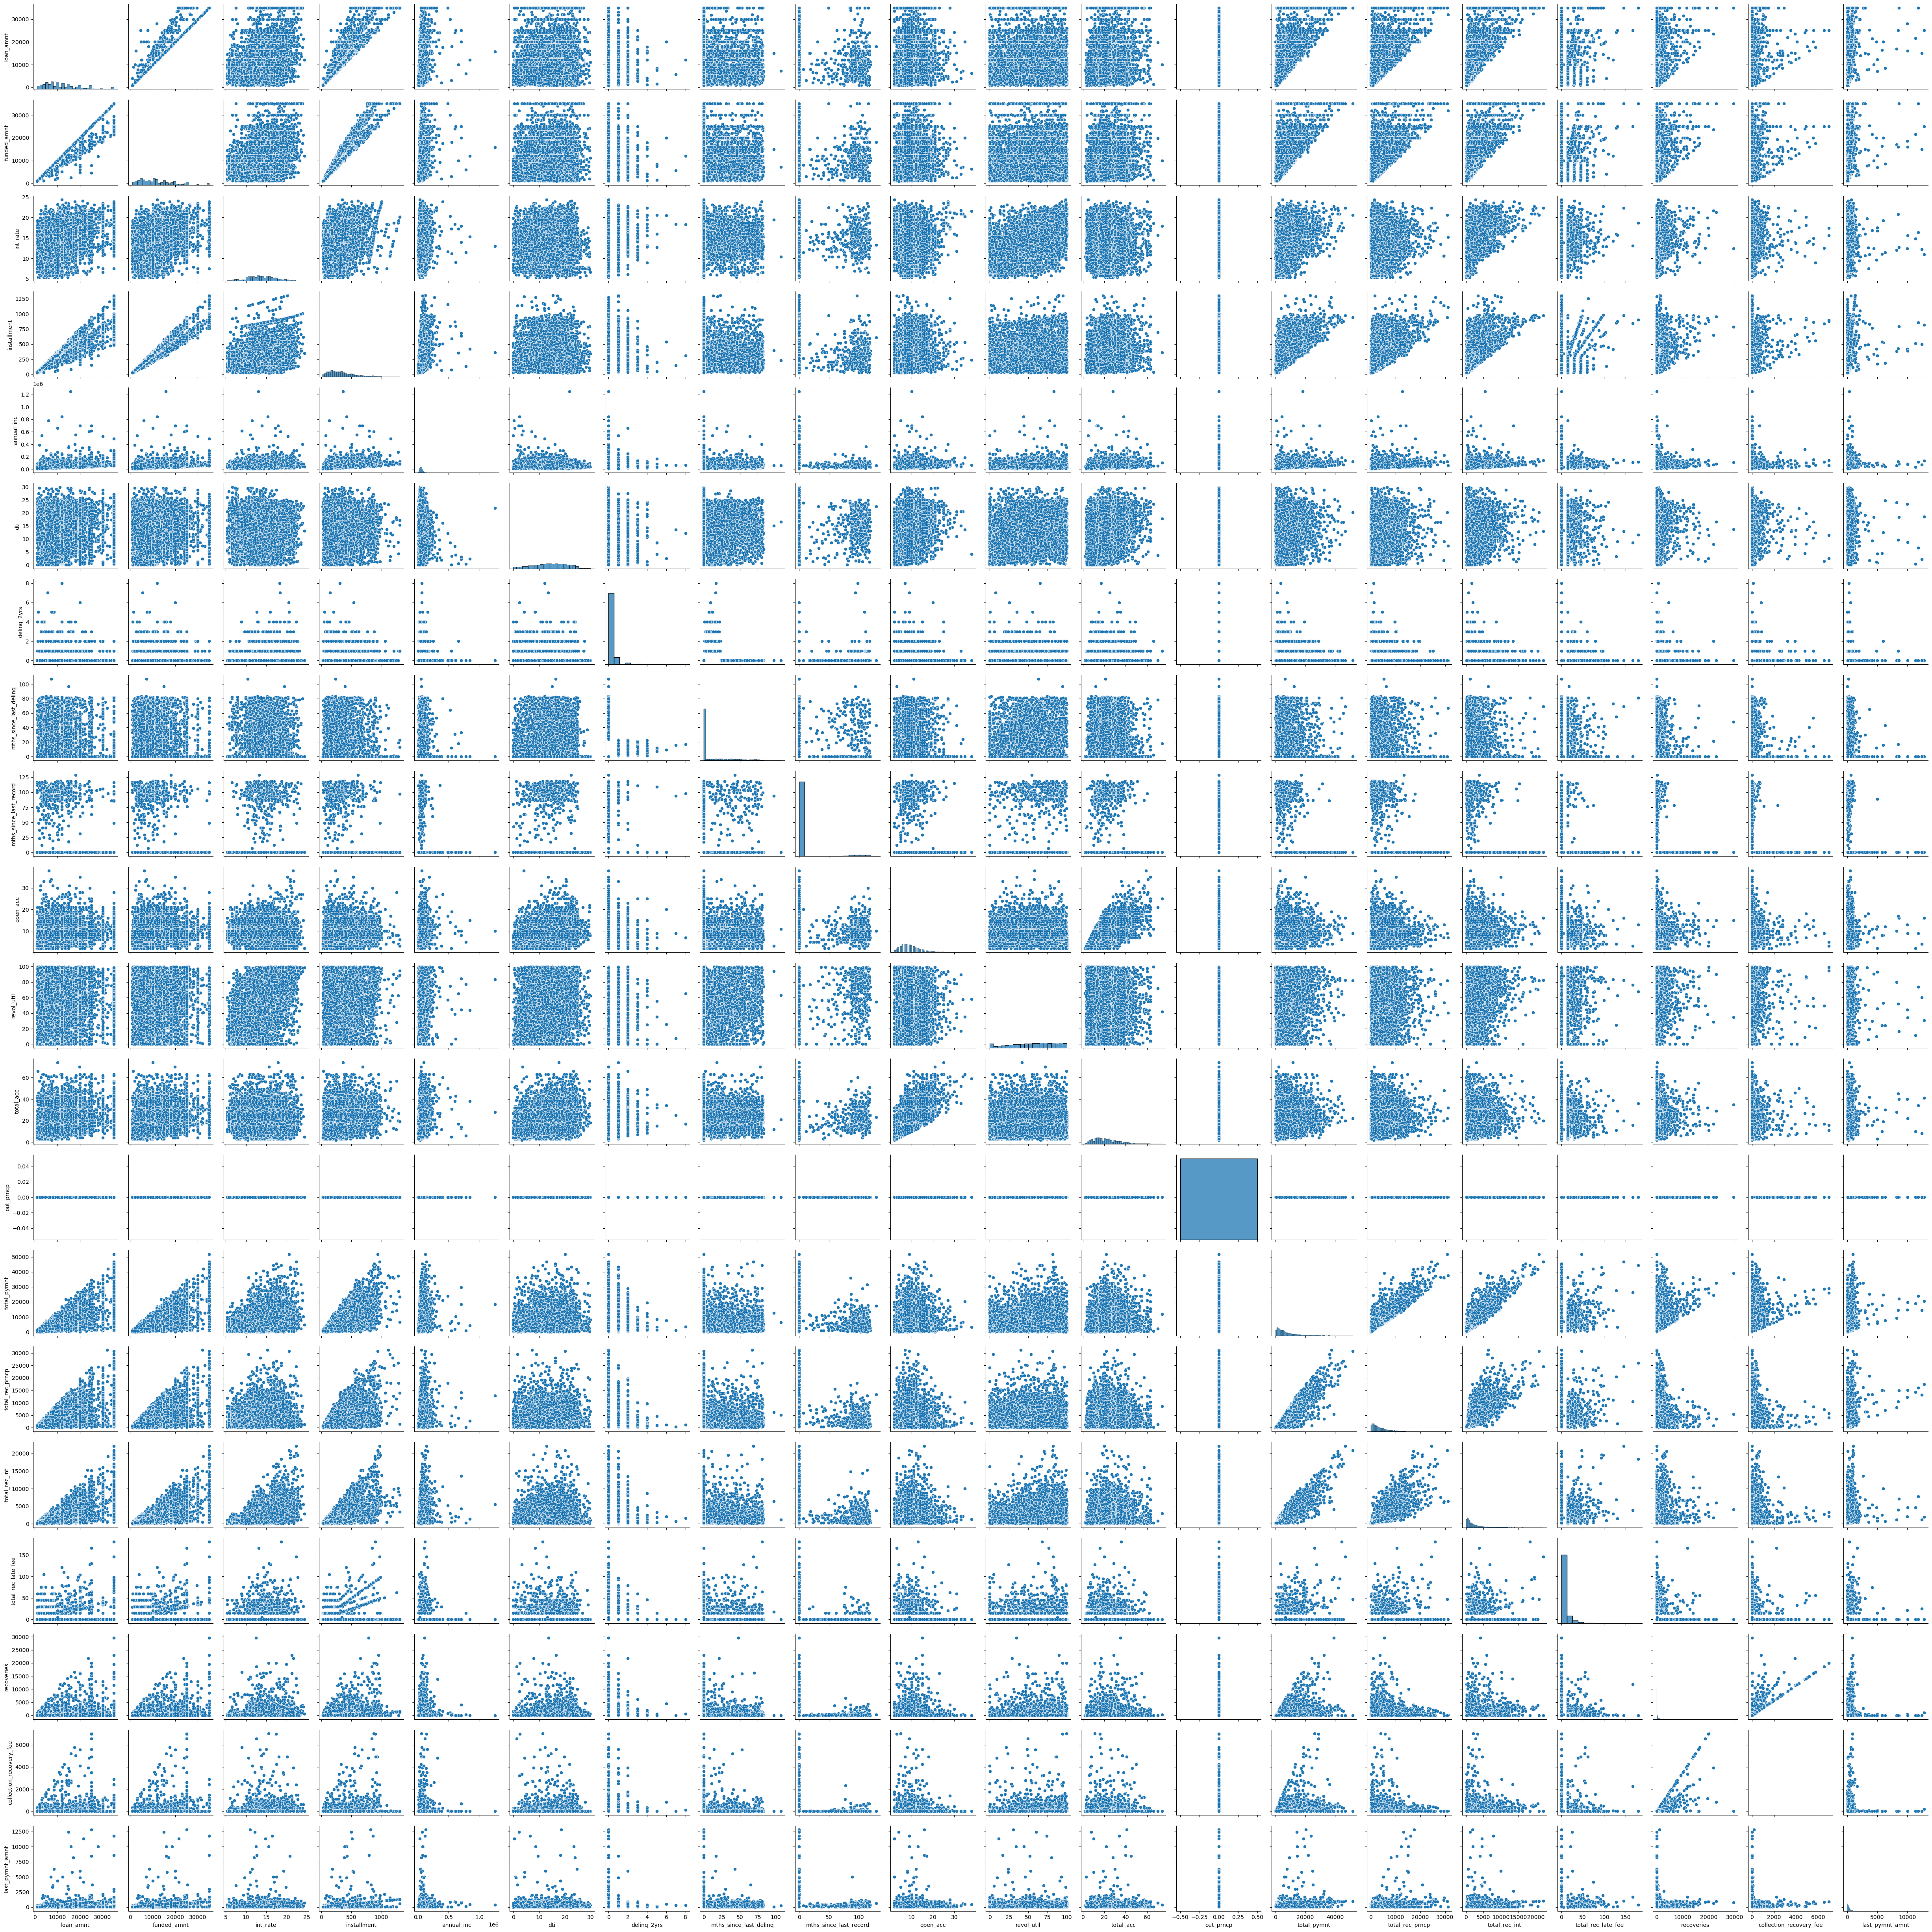

In [296]:
sns.pairplot(df_defaulted[num_cols]) #pairplot only for numerical columns of defaulted loans
plt.show()

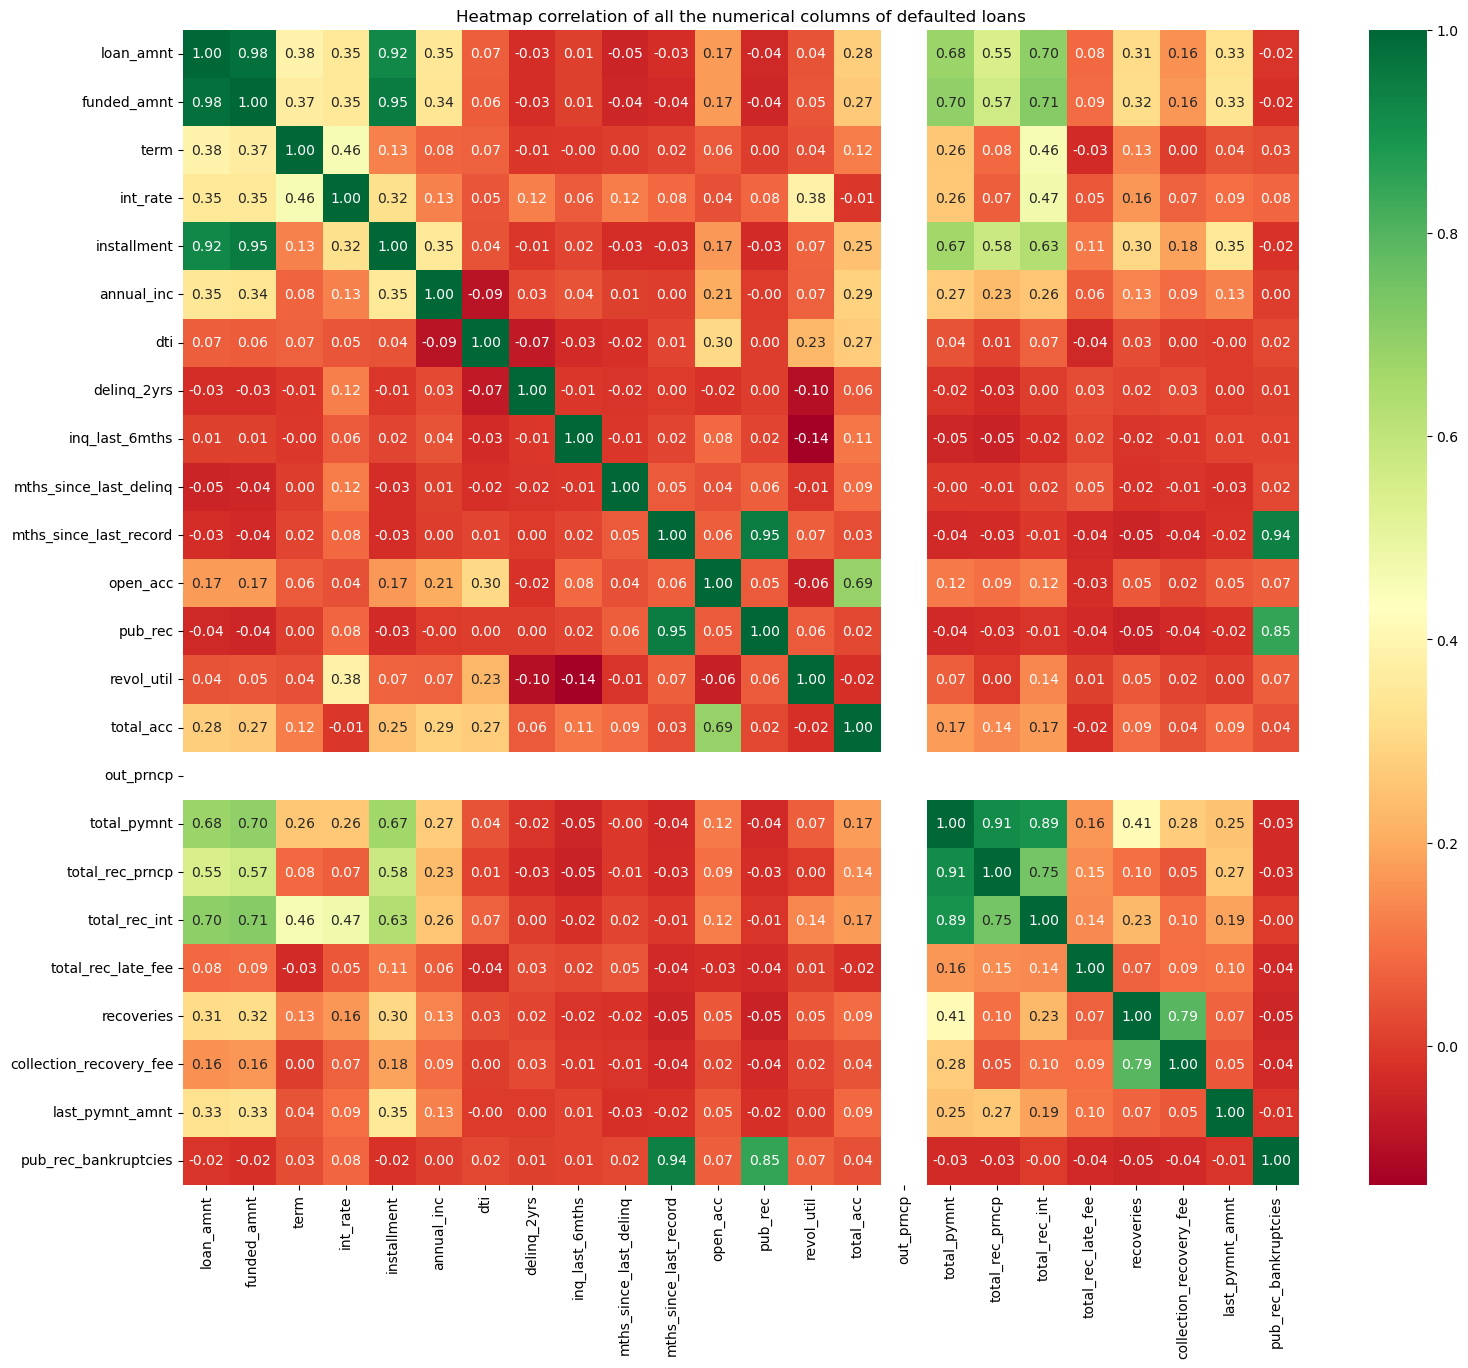

In [294]:
plt.figure(figsize=(18,15)) 
plt.title("Heatmap correlation of all the numerical columns of defaulted loans", fontsize=12)
sns.heatmap(df_defaulted.select_dtypes(include='number').corr(),annot=True,fmt='.2f',cmap="RdYlGn") #include only columns having numeric values of defualted loans
plt.show()
